**a) Perform PCA on MNIST and then perform GMM clustering. (Library can be used for SVD and
GMM) but PCA should be from scratch. PCA should be done for 32, 64 and 128 components.
Clustering should be done in 10, 7, and 4 clusters.**

---




***Importing Libraries and dataset, reading the dataset:***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

print(train_data.head())
print(train_data.info())
print(train_data.describe())

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB
None

***Data Pre-processing:***

In [ ]:
# Separate features and labels for training data
X = train_data.drop('label', axis=1)
y = train_data['label']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

***Perform PCA on MNIST and then perform GMM clustering.***

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
def perform_pca_svd(X, n_components):
    mean = np.mean(X, axis=0)
    X_centered = X - mean
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    top_singular_vectors = Vt[:n_components, :]
    pca_result = np.dot(X_centered, top_singular_vectors.T)
    return pca_result

pca_32 = perform_pca_svd(X_train_scaled, 32).real
pca_64 = perform_pca_svd(X_train_scaled, 64).real
pca_128 = perform_pca_svd(X_train_scaled, 128).real

def perform_gmm(X_pca, n_components):
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(X_pca)
    labels = gmm.predict(X_pca)
    return labels

labels_10 = perform_gmm(pca_32, 10)
labels_7 = perform_gmm(pca_64, 7)
labels_4 = perform_gmm(pca_128, 4)

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


In [ ]:
num_components = [32, 64, 128]
num_clusters = [10, 7, 4]

for n_components in num_components:
    pca_result = perform_pca_svd(X_train_scaled, n_components)

    for n_clusters in num_clusters:
        labels = perform_gmm(pca_result, n_clusters)
        print(f"PCA Components: {n_components}, GMM Clusters: {n_clusters}")
        print("Cluster Assignments for the first 10 data points:")
        print(labels[:10])

PCA Components: 32, GMM Clusters: 10
Cluster Assignments for the first 10 data points:
[0 9 3 5 1 4 5 0 8 8]
PCA Components: 32, GMM Clusters: 7
Cluster Assignments for the first 10 data points:
[0 5 0 6 1 3 6 0 3 1]
PCA Components: 32, GMM Clusters: 4
Cluster Assignments for the first 10 data points:
[0 2 0 0 0 3 1 0 0 0]
PCA Components: 64, GMM Clusters: 10
Cluster Assignments for the first 10 data points:
[5 6 4 4 4 9 1 9 9 4]
PCA Components: 64, GMM Clusters: 7
Cluster Assignments for the first 10 data points:
[5 6 5 5 3 0 1 0 0 3]
PCA Components: 64, GMM Clusters: 4
Cluster Assignments for the first 10 data points:
[0 3 0 0 0 2 1 2 2 0]
PCA Components: 128, GMM Clusters: 10
Cluster Assignments for the first 10 data points:
[9 5 7 6 2 0 6 3 1 4]
PCA Components: 128, GMM Clusters: 7
Cluster Assignments for the first 10 data points:
[1 0 1 3 4 6 2 1 1 4]


/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


PCA Components: 128, GMM Clusters: 4
Cluster Assignments for the first 10 data points:
[1 3 1 1 2 0 2 0 0 3]


**b.) Visualize the images getting clustered in different clusters.**

---



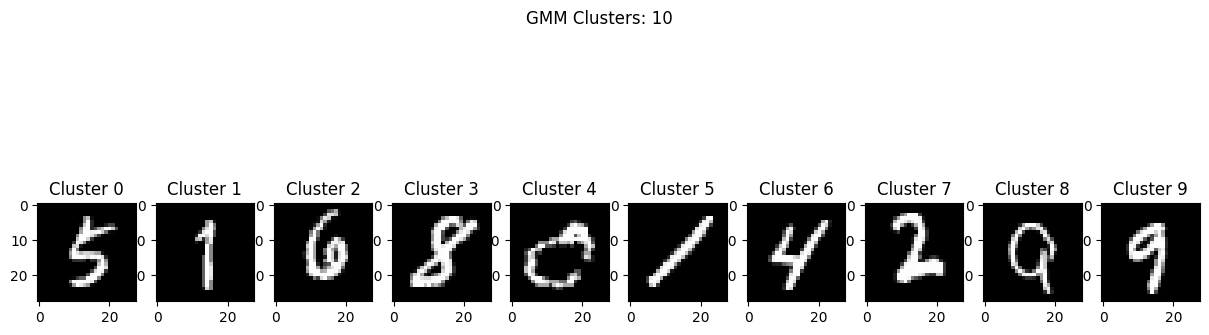

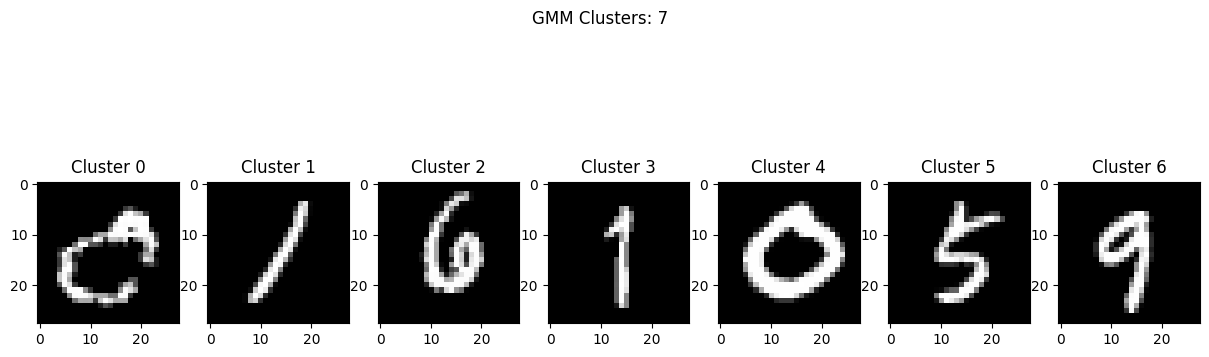

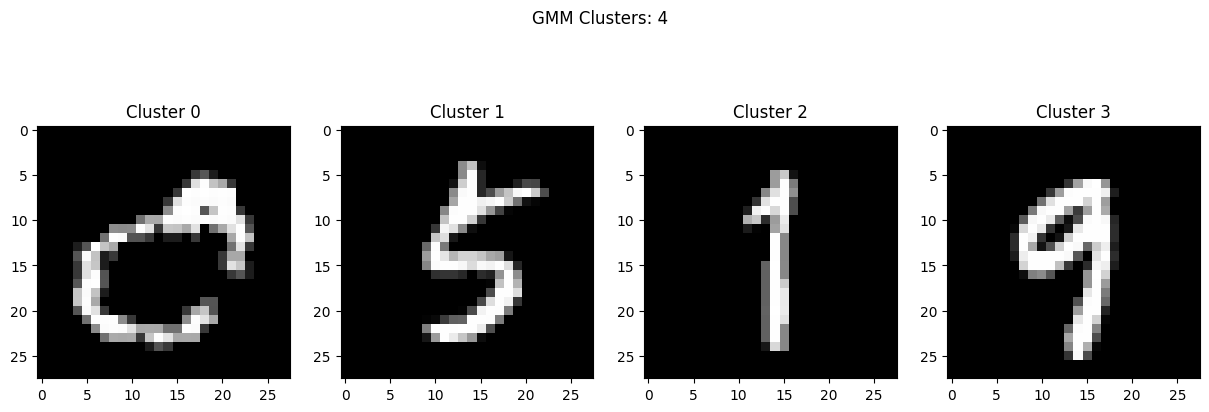

In [ ]:
def visualize(X, labels, n_clusters):
    plt.figure(figsize=(15, 5))
    plt.suptitle(f'GMM Clusters: {n_clusters}')

    for cluster in range(n_clusters):
        plt.subplot(1, n_clusters, cluster + 1)
        plt.title(f'Cluster {cluster}')
        cluster_indices = np.where(labels == cluster)[0]
        if len(cluster_indices) > 0:
            representative_index = cluster_indices[0]
            representative_image = X[representative_index].reshape(28, 28)
            plt.imshow(representative_image, cmap='gray')
        else:
            plt.axis('off')

visualize(X_train_scaled, labels_10, n_clusters=10)
plt.show()
visualize(X_train_scaled, labels_7, n_clusters=7)
plt.show()
visualize(X_train_scaled, labels_4, n_clusters=4)
plt.show()

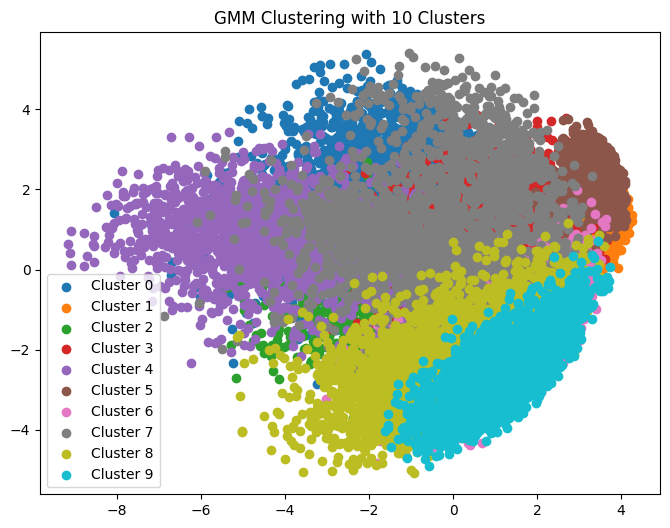

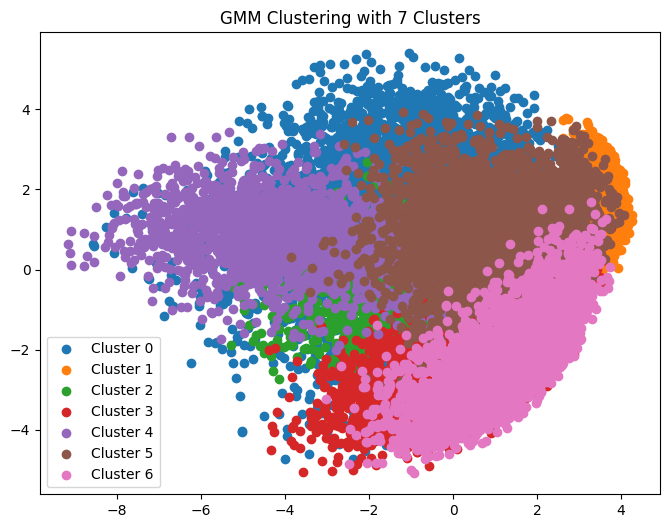

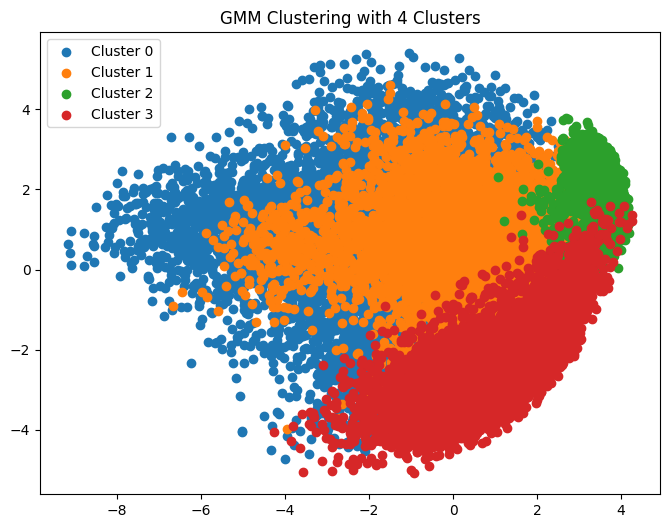

In [ ]:
def plot_gmm_clusters(X_pca, labels, n_clusters, title):
    plt.figure(figsize=(8, 6))
    for i in range(n_clusters):
        plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}')
    plt.title(title)
    plt.legend()
    plt.show()

plot_gmm_clusters(pca_32, labels_10, n_clusters=10, title="GMM Clustering with 10 Clusters")
plot_gmm_clusters(pca_32, labels_7, n_clusters=7, title="GMM Clustering with 7 Clusters")
plot_gmm_clusters(pca_32, labels_4, n_clusters=4, title="GMM Clustering with 4 Clusters")

**d.) Can you find the optimal number of components the PCA should choose which covers almost all the necessary patterns in the data?**


---



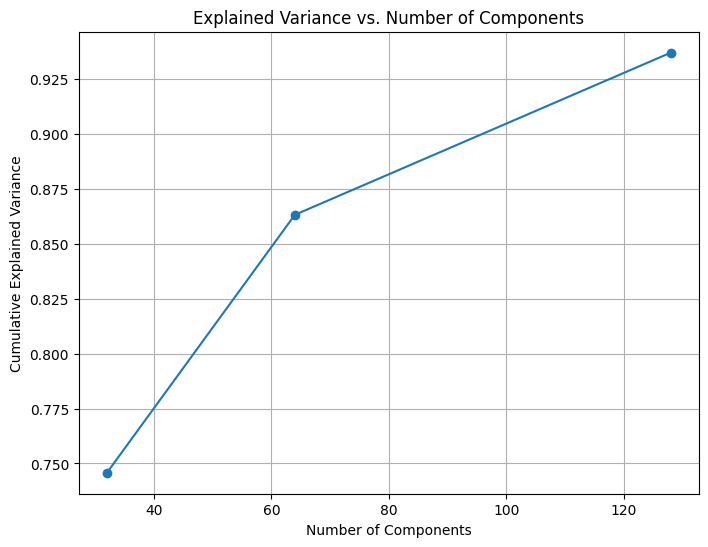

In [ ]:
def optimal(X, n_components_list):
    explained_variances = []

    for n in n_components_list:
        pca_result = perform_pca_svd(X, n)
        explained_variance = np.sum(np.var(pca_result, axis=0)) / np.sum(np.var(X, axis=0))
        explained_variances.append(explained_variance)

    plt.figure(figsize=(8, 6))
    plt.plot(n_components_list, explained_variances, marker='o', linestyle='-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance vs. Number of Components')
    plt.grid()
    plt.show()

n_components_list = [32, 64, 128]

optimal(X_train_scaled, n_components_list)